# Importing Required Modules and Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
dataset = pd.read_csv('dataset_insurance.csv')

In [3]:
dataset



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [6]:
dataset.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [7]:
dataset.corr()['charges']

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

In [8]:
dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [10]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# Data Visualization

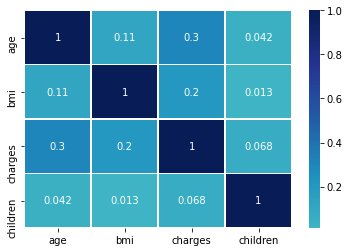

In [11]:
corrs = dataset[['age', 'bmi', 'charges', 'children']].corr()
sns.heatmap(corrs, linewidths = 0.5, annot=True, center=0, cmap="YlGnBu")

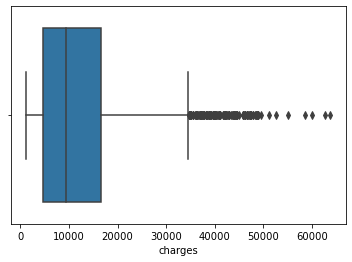

In [12]:
sns.boxplot(dataset['charges'])

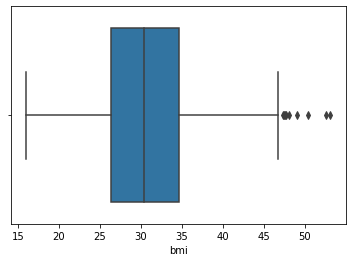

In [13]:
sns.boxplot(dataset['bmi'])

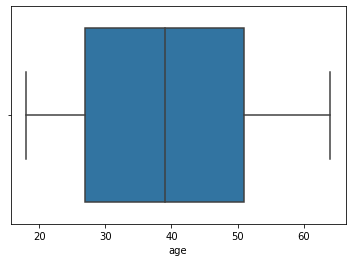

In [14]:
sns.boxplot(dataset['age'])

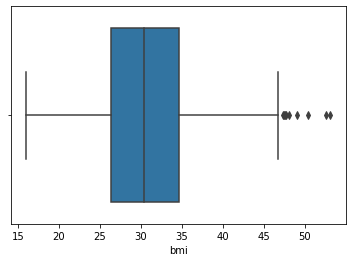

In [15]:
sns.boxplot(dataset['bmi'])

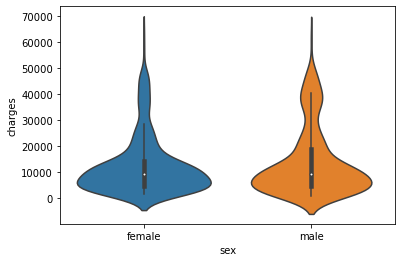

In [16]:
sns.violinplot(x='sex',y='charges',data=dataset)

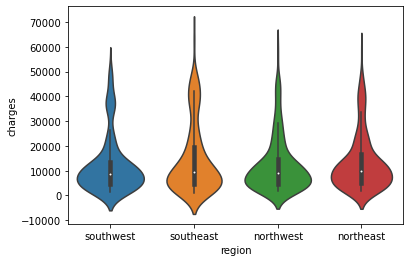

In [17]:
sns.violinplot(x='region',y='charges',data=dataset)

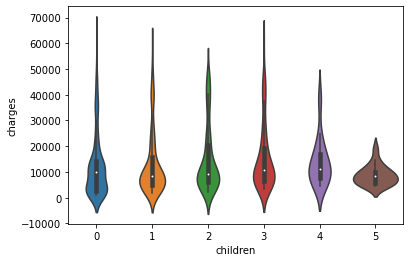

In [18]:
sns.violinplot(x='children',y='charges',data=dataset)

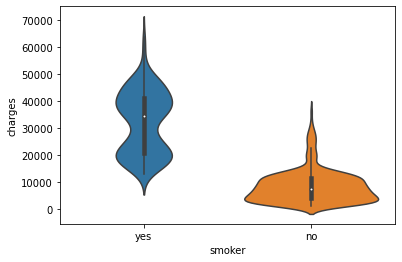

In [19]:
sns.violinplot(x='smoker',y='charges',data=dataset)

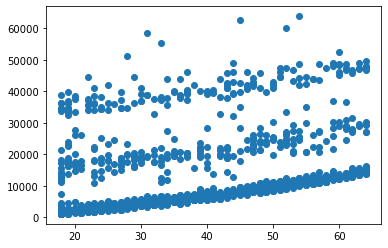

In [20]:
plt.scatter(dataset['age'],dataset['charges'])

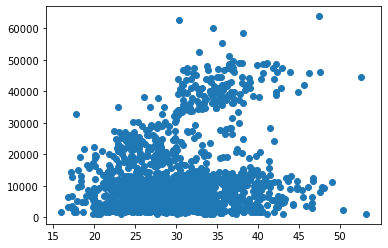

In [21]:
plt.scatter(dataset['bmi'],dataset['charges'])

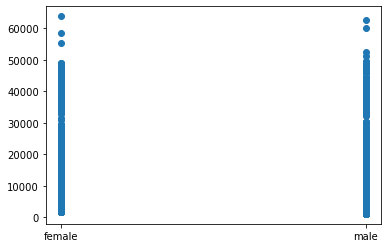

In [22]:
plt.scatter(dataset['sex'],dataset['charges'])

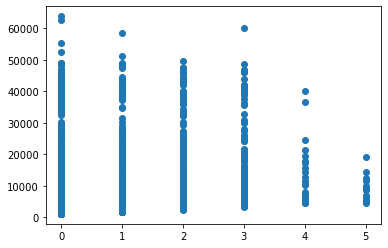

In [23]:
plt.scatter(dataset['children'],dataset['charges'])

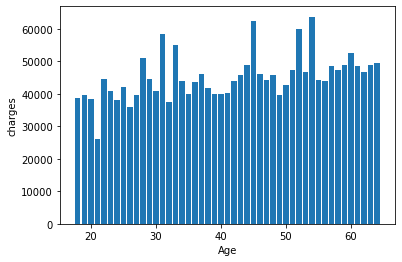

In [24]:
plt.bar(dataset['age'],dataset['charges'])
plt.xlabel("Age")
plt.ylabel("charges")
plt.show()

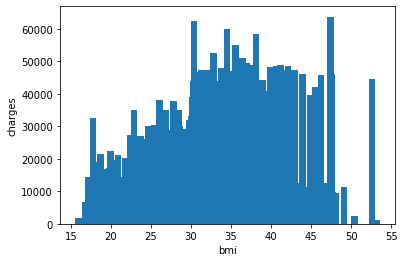

In [25]:
plt.bar(dataset['bmi'],dataset['charges'])
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show()

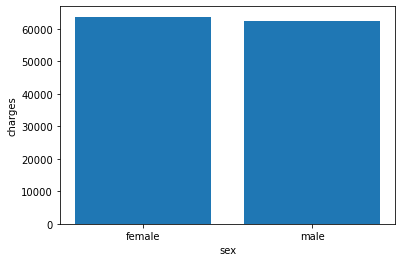

In [26]:
plt.bar(dataset['sex'],dataset['charges'])
plt.xlabel("sex")
plt.ylabel("charges")
plt.show()

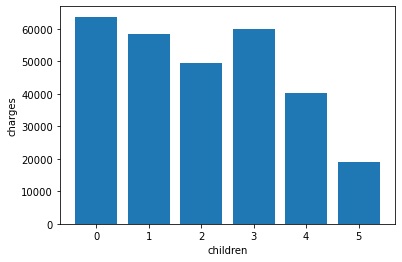

In [27]:
plt.bar(dataset['children'],dataset['charges'])
plt.xlabel("children")
plt.ylabel("charges")
plt.show()

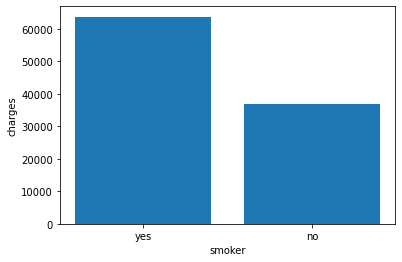

In [28]:
plt.bar(dataset['smoker'],dataset['charges'])
plt.xlabel("smoker")
plt.ylabel("charges")
plt.show()

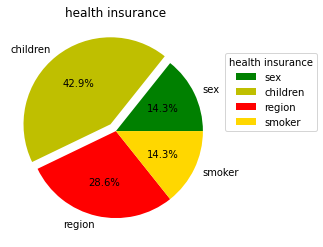

In [29]:
z=[2,6,4,2]
label=["sex","children",'region','smoker']
colors=['g','y','r','gold']
plt.pie(z,labels=label,explode=[0,0.1,0,0],colors=colors,autopct='%1.1f%%')
plt.title("health insurance")
plt.legend(title="health insurance",loc=(1.0,0.5))
plt.show()

<BarContainer object of 4 artists>

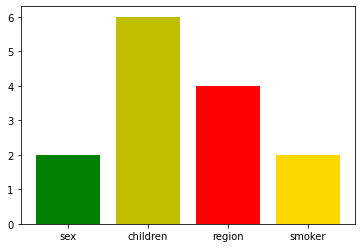

In [30]:
plt.bar(label,z,color=('g','y','r','gold'))

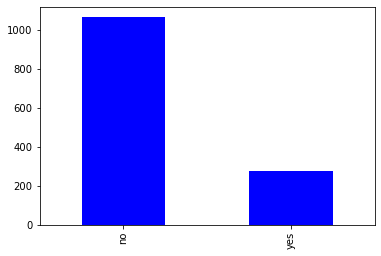

In [31]:
# Visualizing the frequency of the smoker category:
counts = dataset['smoker'].value_counts() 
counts.plot.bar(color = 'blue', grid=False) 

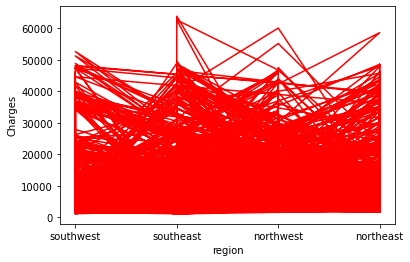

In [32]:
plt.plot(dataset['region'],dataset['charges'],'r')
plt.xlabel('region')
plt.ylabel('Charges')
plt.show()

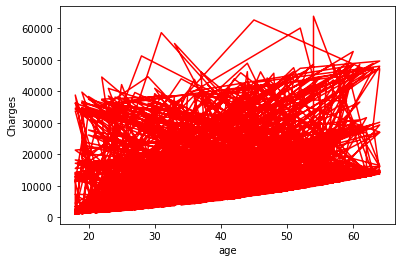

In [33]:
plt.plot(dataset['age'],dataset['charges'],'r')
plt.xlabel('age')
plt.ylabel('Charges')
plt.show()

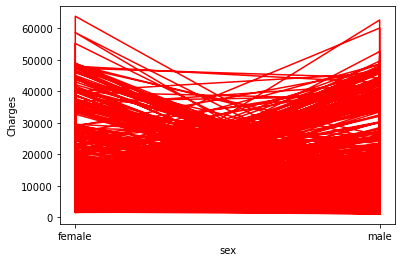

In [34]:
plt.plot(dataset['sex'],dataset['charges'],'r')
plt.xlabel('sex')
plt.ylabel('Charges')
plt.show()

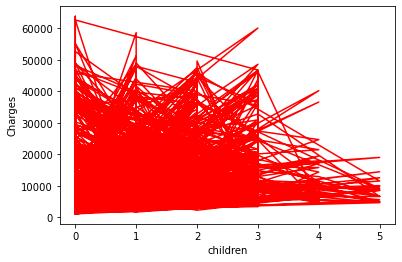

In [35]:
plt.plot(dataset['children'],dataset['charges'],'r')
plt.xlabel('children')
plt.ylabel('Charges')
plt.show()

Text(0.5, 1.0, 'small graph')

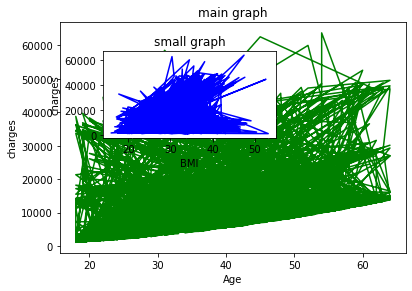

In [36]:
fig=plt.figure()
axes1=fig.add_axes([0.1,0.1,0.8,0.8])#main axes left,bottom,width,height
axes2=fig.add_axes([0.2,0.5,0.4,0.3])
axes1.plot(dataset['age'],dataset['charges'],'g')
axes1.set_xlabel('Age')
axes1.set_ylabel('charges')
axes1.set_title('main graph')
axes2.plot(dataset['bmi'],dataset['charges'],'b')
axes2.set_xlabel('BMI')
axes2.set_ylabel('charges')
axes2.set_title("small graph")

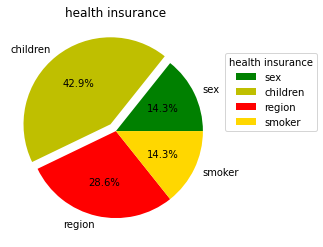

In [37]:
z=[2,6,4,2]
label=["sex","children",'region','smoker']
colors=['g','y','r','gold']
plt.pie(z,labels=label,explode=[0,0.1,0,0],colors=colors,autopct='%1.1f%%')
plt.title("health insurance")
plt.legend(title="health insurance",loc=(1.0,0.5))
plt.show()

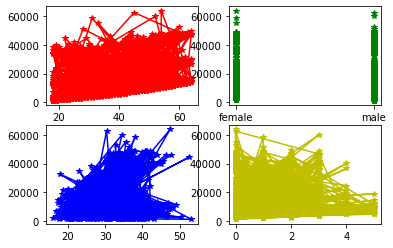

In [38]:
plt.subplot(2,2,1)
plt.plot(dataset['age'],dataset['charges'],'r',marker='*')
plt.subplot(2,2,2)
plt.plot(dataset['sex'],dataset['charges'],'g*')
plt.subplot(2,2,3)
plt.plot(dataset["bmi"],dataset['charges'],'b*-')
plt.subplot(2,2,4)
plt.plot(dataset['children'],dataset['charges'],'y*-')
plt.show()

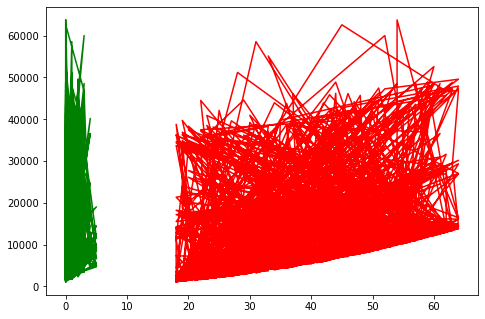

In [39]:
fig=plt.figure()
axes=fig.add_axes([0,0,1,1])#main axes left,bottom,width,height
axes.plot(dataset['age'],dataset['charges'],'r')
axes.plot(dataset['children'],dataset['charges'],'g')

# Data Preprocessing

In [40]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [41]:
lb = LabelEncoder()
dataset.iloc[:,1] = lb.fit_transform(dataset.iloc[:,1])
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [42]:
dataset.iloc[:,4] = lb.fit_transform(dataset.iloc[:,4])
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [43]:
x = dataset.iloc[:,:6]
y = dataset.iloc[:,-1].values
ct = ColumnTransformer([('on',OneHotEncoder(),[5])],remainder='passthrough')
x = ct.fit_transform(x)
x = x[:,1:]

In [44]:
joblib.dump(ct, 'transf')

['transf']

In [45]:
sc = StandardScaler()
dataset.iloc[:,5] = lb.fit_transform(dataset.iloc[:,5])
z=np.abs(stats.zscore(dataset))
z

array([[1.43876426, 1.0105187 , 0.45332   , ..., 1.97058663, 1.34390459,
        0.2985838 ],
       [1.50996545, 0.98959079, 0.5096211 , ..., 0.5074631 , 0.43849455,
        0.95368917],
       [0.79795355, 0.98959079, 0.38330685, ..., 0.5074631 , 0.43849455,
        0.72867467],
       ...,
       [1.50996545, 1.0105187 , 1.0148781 , ..., 0.5074631 , 0.43849455,
        0.96159623],
       [1.29636188, 1.0105187 , 0.79781341, ..., 0.5074631 , 1.34390459,
        0.93036151],
       [1.55168573, 1.0105187 , 0.26138796, ..., 1.97058663, 0.46691549,
        1.31105347]])

In [46]:
threshold=3
np.where(z>threshold)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

In [47]:
z[1317][6]

1.000121811689711

In [48]:
dataset=dataset[(z<=3).all(axis=1)]
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [49]:
Q1=dataset.quantile(0.25)
Q1

age           27.0000
sex            0.0000
bmi           26.3150
children       0.0000
smoker         0.0000
region         1.0000
charges     4686.3887
Name: 0.25, dtype: float64

In [50]:
Q3=dataset.quantile(0.75)
Q3

age            51.0000
sex             1.0000
bmi            34.5800
children        2.0000
smoker          0.0000
region          2.0000
charges     16577.7795
Name: 0.75, dtype: float64

In [51]:
IQR=Q3-Q1
IQR

age            24.0000
sex             1.0000
bmi             8.2650
children        2.0000
smoker          0.0000
region          1.0000
charges     11891.3908
dtype: float64

In [52]:
boston_iqr_outlier=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]
boston_iqr_outlier

,age,sex,bmi,children,smoker,region,charges
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,3,11411.68500
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350


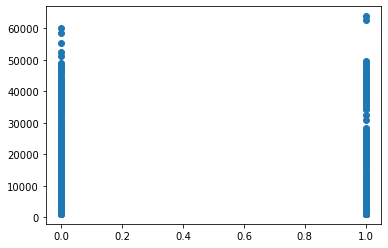

In [53]:
plt.scatter(x[:,1],y)

In [54]:
mn = MinMaxScaler()
x = mn.fit_transform(x)
x

array([[0.        , 0.        , 1.        , ..., 0.3212268 , 0.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.47914985, 0.2       ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.45843422, 0.6       ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.56201238, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.26472962, 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.35270379, 0.        ,
        1.        ]])

In [55]:
x[0]

array([0.        , 0.        , 1.        , 0.02173913, 0.        ,
       0.3212268 , 0.        , 1.        ])

# Training and Testing the Data and Model Evaluation

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [57]:
x_train.shape

(1070, 8)

In [58]:
x_test.shape

(268, 8)

In [59]:
y_train.shape

(1070,)

In [60]:
y_test.shape

(268,)

In [61]:
from sklearn.linear_model import LinearRegression
mr = LinearRegression()
mr.fit(x_train,y_train)

LinearRegression()

In [62]:
y_pred = mr.predict(x_test)
y_pred

array([1.11699271e+04, 9.48670909e+03, 3.81811231e+04, 1.62663133e+04,
       6.91464801e+03, 3.96348488e+03, 1.57939691e+03, 1.43852566e+04,
       9.01257970e+03, 7.50846068e+03, 4.49176728e+03, 1.02795839e+04,
       8.80129751e+03, 3.79802013e+03, 2.79262010e+04, 1.07151158e+04,
       1.12889756e+04, 6.10501768e+03, 8.24104117e+03, 2.71445089e+04,
       3.36440910e+04, 1.43551043e+04, 1.17372043e+04, 3.21374335e+04,
       4.17005913e+03, 9.25496051e+03, 1.08433751e+03, 9.80417085e+03,
       3.77104596e+03, 1.04318587e+04, 9.00931722e+03, 4.00749509e+04,
       1.56889543e+04, 1.38794545e+04, 2.47597127e+04, 5.16638285e+03,
       1.26109277e+04, 3.07691018e+04, 3.35498325e+04, 3.67154946e+03,
       3.97568613e+03, 3.98729942e+03, 3.05285774e+04, 3.95053023e+04,
       2.78105036e+04, 5.09258923e+03, 1.06042481e+04, 7.82952256e+03,
       3.59255553e+03, 1.02128745e+04, 5.72038147e+03, 3.42627499e+03,
       3.30210242e+04, 3.84738218e+04, 1.60534782e+04, 7.16491905e+03,
      

In [63]:
y_pred.shape

(268,)

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7999876970680433

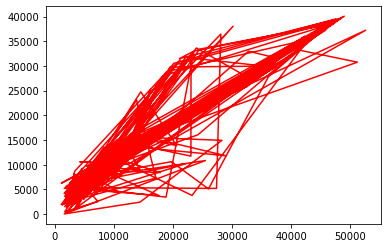

In [65]:
plt.plot(y_test,y_pred,'r')
plt.show()

In [66]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

5641.626558850191

In [67]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='mse',max_depth=4,random_state=0)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [68]:
y_pred = dt.predict(x_test)

In [69]:
y_pred

array([12786.94326301,  9219.59177795, 45262.55810804, 15331.9419564 ,
       10805.93703161,  7136.32098617,  2874.70660944, 10805.93703161,
        7136.32098617,  5484.77212765,  7136.32098617, 10805.93703161,
       10805.93703161,  7136.32098617, 17670.56383   ,  9219.59177795,
       15331.9419564 ,  5484.77212765,  7136.32098617, 36429.01656229,
       23452.5698288 , 12786.94326301, 12786.94326301, 27697.80077211,
        2874.70660944,  5484.77212765,  5484.77212765,  7136.32098617,
        5484.77212765, 10805.93703161,  7136.32098617, 45262.55810804,
       15331.9419564 , 12786.94326301, 17670.56383   ,  5484.77212765,
        9219.59177795, 36429.01656229, 40980.46124793,  2874.70660944,
        7136.32098617,  5484.77212765, 20130.86533913, 45262.55810804,
       36429.01656229,  5827.62552429,  9219.59177795,  7136.32098617,
        5484.77212765, 12786.94326301,  5484.77212765,  5827.62552429,
       27697.80077211, 45262.55810804, 12786.94326301,  5484.77212765,
      

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8802320313936407

In [71]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

4365.623933841241

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=20,random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [73]:
joblib.dump(rf,'model.save')

['model.save']

In [74]:
y_pred = rf.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8766878589198298

In [75]:
!pip install six
!pip install graphviz

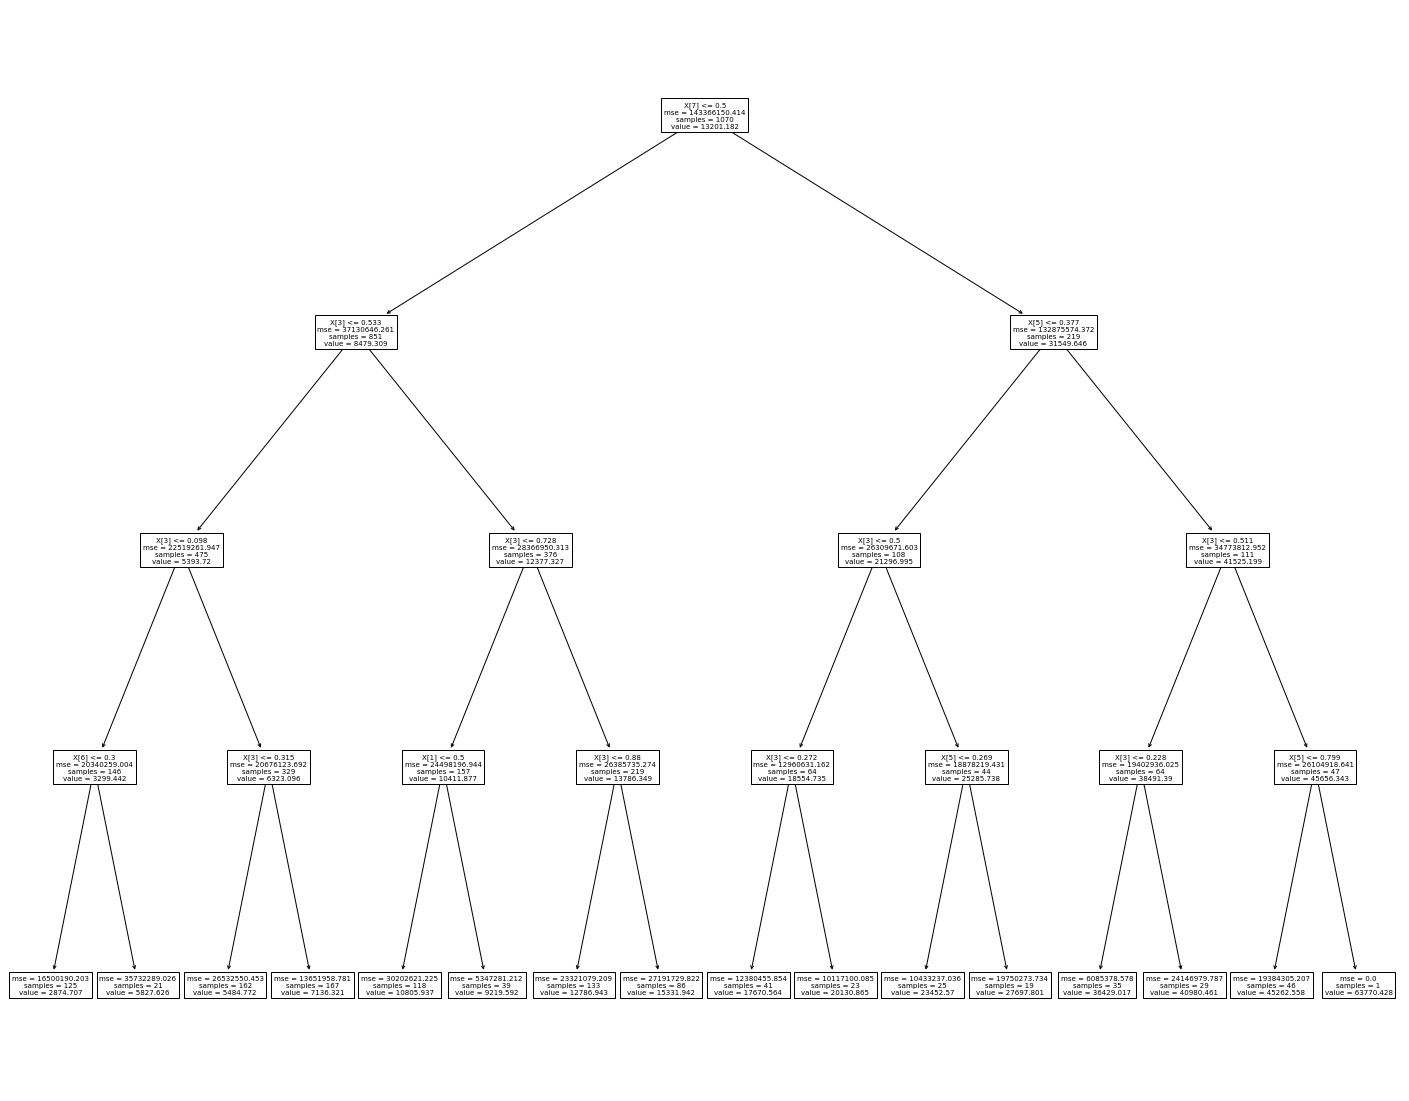

In [76]:
import graphviz
from six import StringIO 
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ =plot_tree(dt)

In [77]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

4429.746760701804

In [78]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [79]:
model=Sequential()

In [80]:
model.add(Dense(input_dim=8,kernel_initializer='normal',units=30,activation='relu'))

In [81]:
model.add(Dense(kernel_initializer='normal',units=25,activation='relu'))

In [82]:
model.add(Dense(kernel_initializer='normal',units=15,activation='relu'))

In [83]:
model.add(Dense(kernel_initializer='normal',units=1,activation='linear'))

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 1,451
Trainable params: 1,451
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [86]:
model.fit(x_train,y_train,epochs=3000, batch_size=32)

Epoch 1/3000
34/34 [==============================] - 0s 880us/step - loss: 13201.1465 - mean_absolute_error: 13201.1465
Epoch 2/3000
34/34 [==============================] - 0s 1ms/step - loss: 13200.7773 - mean_absolute_error: 13200.7773
Epoch 3/3000
34/34 [==============================] - 0s 997us/step - loss: 13197.4990 - mean_absolute_error: 13197.4990
Epoch 4/3000
34/34 [==============================] - 0s 939us/step - loss: 13181.1338 - mean_absolute_error: 13181.1338
Epoch 5/3000
34/34 [==============================] - 0s 763us/step - loss: 13128.4121 - mean_absolute_error: 13128.4121
Epoch 6/3000
34/34 [==============================] - 0s 939us/step - loss: 13000.8936 - mean_absolute_error: 13000.8936
Epoch 7/3000
34/34 [==============================] - 0s 733us/step - loss: 12744.0400 - mean_absolute_error: 12744.0400
Epoch 8/3000
34/34 [==============================] - 0s 821us/step - loss: 12290.7715 - mean_absolute_error: 12290.7715
Epoch 9/3000
34/34 [==============

34/34 [==============================] - 0s 821us/step - loss: 3552.5662 - mean_absolute_error: 3552.5662
Epoch 70/3000
34/34 [==============================] - 0s 792us/step - loss: 3545.8728 - mean_absolute_error: 3545.8728
Epoch 71/3000
34/34 [==============================] - 0s 763us/step - loss: 3542.4023 - mean_absolute_error: 3542.4023
Epoch 72/3000
34/34 [==============================] - 0s 792us/step - loss: 3536.4595 - mean_absolute_error: 3536.4595
Epoch 73/3000
34/34 [==============================] - 0s 733us/step - loss: 3535.4255 - mean_absolute_error: 3535.4255
Epoch 74/3000
34/34 [==============================] - 0s 851us/step - loss: 3528.6863 - mean_absolute_error: 3528.6863
Epoch 75/3000
34/34 [==============================] - 0s 851us/step - loss: 3521.7395 - mean_absolute_error: 3521.7395
Epoch 76/3000
34/34 [==============================] - 0s 792us/step - loss: 3519.1858 - mean_absolute_error: 3519.1858
Epoch 77/3000
34/34 [==============================] -

34/34 [==============================] - 0s 821us/step - loss: 3258.7795 - mean_absolute_error: 3258.7795
Epoch 138/3000
34/34 [==============================] - 0s 851us/step - loss: 3258.1765 - mean_absolute_error: 3258.1765
Epoch 139/3000
34/34 [==============================] - 0s 763us/step - loss: 3256.2959 - mean_absolute_error: 3256.2959
Epoch 140/3000
34/34 [==============================] - 0s 650us/step - loss: 3258.3301 - mean_absolute_error: 3258.3301
Epoch 141/3000
34/34 [==============================] - 0s 675us/step - loss: 3254.2500 - mean_absolute_error: 3254.2500
Epoch 142/3000
34/34 [==============================] - 0s 763us/step - loss: 3253.5278 - mean_absolute_error: 3253.5278
Epoch 143/3000
34/34 [==============================] - 0s 704us/step - loss: 3251.1067 - mean_absolute_error: 3251.1067
Epoch 144/3000
34/34 [==============================] - 0s 733us/step - loss: 3251.7778 - mean_absolute_error: 3251.7778
Epoch 145/3000
34/34 [=========================

34/34 [==============================] - 0s 752us/step - loss: 3213.1484 - mean_absolute_error: 3213.1484
Epoch 205/3000
34/34 [==============================] - 0s 792us/step - loss: 3211.4038 - mean_absolute_error: 3211.4038
Epoch 206/3000
34/34 [==============================] - 0s 763us/step - loss: 3212.8608 - mean_absolute_error: 3212.8608
Epoch 207/3000
34/34 [==============================] - 0s 733us/step - loss: 3212.0806 - mean_absolute_error: 3212.0806
Epoch 208/3000
34/34 [==============================] - 0s 675us/step - loss: 3211.0437 - mean_absolute_error: 3211.0437
Epoch 209/3000
34/34 [==============================] - 0s 733us/step - loss: 3211.1011 - mean_absolute_error: 3211.1011
Epoch 210/3000
34/34 [==============================] - 0s 792us/step - loss: 3209.4692 - mean_absolute_error: 3209.4692
Epoch 211/3000
34/34 [==============================] - 0s 733us/step - loss: 3209.6084 - mean_absolute_error: 3209.6084
Epoch 212/3000
34/34 [=========================

34/34 [==============================] - 0s 851us/step - loss: 3195.7266 - mean_absolute_error: 3195.7266
Epoch 272/3000
34/34 [==============================] - 0s 909us/step - loss: 3192.8245 - mean_absolute_error: 3192.8245
Epoch 273/3000
34/34 [==============================] - 0s 851us/step - loss: 3194.4236 - mean_absolute_error: 3194.4236
Epoch 274/3000
34/34 [==============================] - 0s 909us/step - loss: 3196.3289 - mean_absolute_error: 3196.3289
Epoch 275/3000
34/34 [==============================] - 0s 880us/step - loss: 3195.5845 - mean_absolute_error: 3195.5845
Epoch 276/3000
34/34 [==============================] - 0s 880us/step - loss: 3193.2493 - mean_absolute_error: 3193.2493
Epoch 277/3000
34/34 [==============================] - 0s 851us/step - loss: 3194.3997 - mean_absolute_error: 3194.3997
Epoch 278/3000
34/34 [==============================] - 0s 792us/step - loss: 3192.6245 - mean_absolute_error: 3192.6245
Epoch 279/3000
34/34 [=========================

34/34 [==============================] - 0s 880us/step - loss: 3163.2725 - mean_absolute_error: 3163.2725
Epoch 339/3000
34/34 [==============================] - 0s 763us/step - loss: 3161.0327 - mean_absolute_error: 3161.0327
Epoch 340/3000
34/34 [==============================] - 0s 763us/step - loss: 3162.4045 - mean_absolute_error: 3162.4045
Epoch 341/3000
34/34 [==============================] - 0s 880us/step - loss: 3160.7593 - mean_absolute_error: 3160.7593
Epoch 342/3000
34/34 [==============================] - 0s 763us/step - loss: 3159.7227 - mean_absolute_error: 3159.7227
Epoch 343/3000
34/34 [==============================] - 0s 763us/step - loss: 3162.6196 - mean_absolute_error: 3162.6196
Epoch 344/3000
34/34 [==============================] - 0s 763us/step - loss: 3165.5762 - mean_absolute_error: 3165.5762
Epoch 345/3000
34/34 [==============================] - 0s 763us/step - loss: 3158.5691 - mean_absolute_error: 3158.5691
Epoch 346/3000
34/34 [=========================

34/34 [==============================] - 0s 880us/step - loss: 3103.0381 - mean_absolute_error: 3103.0381
Epoch 406/3000
34/34 [==============================] - 0s 851us/step - loss: 3101.8643 - mean_absolute_error: 3101.8643
Epoch 407/3000
34/34 [==============================] - 0s 821us/step - loss: 3102.4636 - mean_absolute_error: 3102.4636
Epoch 408/3000
34/34 [==============================] - 0s 851us/step - loss: 3099.3909 - mean_absolute_error: 3099.3909
Epoch 409/3000
34/34 [==============================] - 0s 851us/step - loss: 3103.7771 - mean_absolute_error: 3103.7771
Epoch 410/3000
34/34 [==============================] - 0s 880us/step - loss: 3097.1355 - mean_absolute_error: 3097.1355
Epoch 411/3000
34/34 [==============================] - 0s 851us/step - loss: 3097.0786 - mean_absolute_error: 3097.0786
Epoch 412/3000
34/34 [==============================] - 0s 909us/step - loss: 3097.2207 - mean_absolute_error: 3097.2207
Epoch 413/3000
34/34 [=========================

34/34 [==============================] - 0s 821us/step - loss: 3012.6335 - mean_absolute_error: 3012.6335
Epoch 473/3000
34/34 [==============================] - 0s 792us/step - loss: 3008.6765 - mean_absolute_error: 3008.6765
Epoch 474/3000
34/34 [==============================] - 0s 763us/step - loss: 3007.8518 - mean_absolute_error: 3007.8518
Epoch 475/3000
34/34 [==============================] - 0s 733us/step - loss: 3003.6233 - mean_absolute_error: 3003.6233
Epoch 476/3000
34/34 [==============================] - 0s 792us/step - loss: 3001.3809 - mean_absolute_error: 3001.3809
Epoch 477/3000
34/34 [==============================] - 0s 704us/step - loss: 3001.9851 - mean_absolute_error: 3001.9851
Epoch 478/3000
34/34 [==============================] - 0s 704us/step - loss: 2999.0176 - mean_absolute_error: 2999.0176
Epoch 479/3000
34/34 [==============================] - 0s 792us/step - loss: 2998.9924 - mean_absolute_error: 2998.9924
Epoch 480/3000
34/34 [=========================

34/34 [==============================] - 0s 821us/step - loss: 2841.2974 - mean_absolute_error: 2841.2974
Epoch 540/3000
34/34 [==============================] - 0s 851us/step - loss: 2833.6802 - mean_absolute_error: 2833.6802
Epoch 541/3000
34/34 [==============================] - 0s 880us/step - loss: 2831.1960 - mean_absolute_error: 2831.1960
Epoch 542/3000
34/34 [==============================] - 0s 921us/step - loss: 2825.8774 - mean_absolute_error: 2825.8774
Epoch 543/3000
34/34 [==============================] - 0s 880us/step - loss: 2824.8718 - mean_absolute_error: 2824.8718
Epoch 544/3000
34/34 [==============================] - 0s 851us/step - loss: 2821.8167 - mean_absolute_error: 2821.8167
Epoch 545/3000
34/34 [==============================] - 0s 916us/step - loss: 2819.9578 - mean_absolute_error: 2819.9578
Epoch 546/3000
34/34 [==============================] - 0s 821us/step - loss: 2817.1658 - mean_absolute_error: 2817.1658
Epoch 547/3000
34/34 [=========================

34/34 [==============================] - 0s 851us/step - loss: 2573.0227 - mean_absolute_error: 2573.0227
Epoch 607/3000
34/34 [==============================] - 0s 851us/step - loss: 2567.7793 - mean_absolute_error: 2567.7793
Epoch 608/3000
34/34 [==============================] - 0s 810us/step - loss: 2566.4929 - mean_absolute_error: 2566.4929
Epoch 609/3000
34/34 [==============================] - 0s 821us/step - loss: 2561.2168 - mean_absolute_error: 2561.2168
Epoch 610/3000
34/34 [==============================] - 0s 880us/step - loss: 2557.5249 - mean_absolute_error: 2557.5249
Epoch 611/3000
34/34 [==============================] - 0s 816us/step - loss: 2551.4944 - mean_absolute_error: 2551.4944
Epoch 612/3000
34/34 [==============================] - 0s 880us/step - loss: 2546.9060 - mean_absolute_error: 2546.9060
Epoch 613/3000
34/34 [==============================] - 0s 851us/step - loss: 2542.7925 - mean_absolute_error: 2542.7925
Epoch 614/3000
34/34 [=========================

34/34 [==============================] - 0s 742us/step - loss: 2304.5847 - mean_absolute_error: 2304.5847
Epoch 674/3000
34/34 [==============================] - 0s 851us/step - loss: 2299.2434 - mean_absolute_error: 2299.2434
Epoch 675/3000
34/34 [==============================] - 0s 763us/step - loss: 2294.6375 - mean_absolute_error: 2294.6375
Epoch 676/3000
34/34 [==============================] - 0s 743us/step - loss: 2290.5457 - mean_absolute_error: 2290.5457
Epoch 677/3000
34/34 [==============================] - 0s 851us/step - loss: 2286.6414 - mean_absolute_error: 2286.6414
Epoch 678/3000
34/34 [==============================] - 0s 909us/step - loss: 2284.9102 - mean_absolute_error: 2284.9102
Epoch 679/3000
34/34 [==============================] - 0s 792us/step - loss: 2281.3687 - mean_absolute_error: 2281.3687
Epoch 680/3000
34/34 [==============================] - 0s 763us/step - loss: 2275.5205 - mean_absolute_error: 2275.5205
Epoch 681/3000
34/34 [=========================

34/34 [==============================] - 0s 792us/step - loss: 2074.4636 - mean_absolute_error: 2074.4636
Epoch 741/3000
34/34 [==============================] - 0s 939us/step - loss: 2073.9375 - mean_absolute_error: 2073.9375
Epoch 742/3000
34/34 [==============================] - 0s 821us/step - loss: 2068.3765 - mean_absolute_error: 2068.3765
Epoch 743/3000
34/34 [==============================] - 0s 880us/step - loss: 2066.6384 - mean_absolute_error: 2066.6384
Epoch 744/3000
34/34 [==============================] - 0s 909us/step - loss: 2064.8320 - mean_absolute_error: 2064.8320
Epoch 745/3000
34/34 [==============================] - 0s 851us/step - loss: 2061.7344 - mean_absolute_error: 2061.7344
Epoch 746/3000
34/34 [==============================] - 0s 851us/step - loss: 2061.7915 - mean_absolute_error: 2061.7915
Epoch 747/3000
34/34 [==============================] - 0s 851us/step - loss: 2062.1023 - mean_absolute_error: 2062.1023
Epoch 748/3000
34/34 [=========================

34/34 [==============================] - 0s 909us/step - loss: 1987.9039 - mean_absolute_error: 1987.9039
Epoch 808/3000
34/34 [==============================] - 0s 1ms/step - loss: 1984.1615 - mean_absolute_error: 1984.1615
Epoch 809/3000
34/34 [==============================] - 0s 1ms/step - loss: 1984.8489 - mean_absolute_error: 1984.8489
Epoch 810/3000
34/34 [==============================] - 0s 909us/step - loss: 1983.2173 - mean_absolute_error: 1983.2173
Epoch 811/3000
34/34 [==============================] - 0s 792us/step - loss: 1983.1068 - mean_absolute_error: 1983.1068
Epoch 812/3000
34/34 [==============================] - 0s 880us/step - loss: 1981.0465 - mean_absolute_error: 1981.0465
Epoch 813/3000
34/34 [==============================] - 0s 909us/step - loss: 1980.8243 - mean_absolute_error: 1980.8243
Epoch 814/3000
34/34 [==============================] - 0s 821us/step - loss: 1984.5596 - mean_absolute_error: 1984.5596
Epoch 815/3000
34/34 [=============================

34/34 [==============================] - 0s 880us/step - loss: 1954.9691 - mean_absolute_error: 1954.9691
Epoch 875/3000
34/34 [==============================] - 0s 851us/step - loss: 1952.5397 - mean_absolute_error: 1952.5397
Epoch 876/3000
34/34 [==============================] - 0s 909us/step - loss: 1952.5602 - mean_absolute_error: 1952.5602
Epoch 877/3000
34/34 [==============================] - 0s 1ms/step - loss: 1955.3024 - mean_absolute_error: 1955.3024
Epoch 878/3000
34/34 [==============================] - 0s 1ms/step - loss: 1953.3055 - mean_absolute_error: 1953.3055
Epoch 879/3000
34/34 [==============================] - 0s 1ms/step - loss: 1950.9153 - mean_absolute_error: 1950.9153
Epoch 880/3000
34/34 [==============================] - 0s 851us/step - loss: 1952.4116 - mean_absolute_error: 1952.4116
Epoch 881/3000
34/34 [==============================] - 0s 851us/step - loss: 1951.5377 - mean_absolute_error: 1951.5377
Epoch 882/3000
34/34 [==============================]

34/34 [==============================] - 0s 733us/step - loss: 1940.6124 - mean_absolute_error: 1940.6124
Epoch 942/3000
34/34 [==============================] - 0s 792us/step - loss: 1942.6058 - mean_absolute_error: 1942.6058
Epoch 943/3000
34/34 [==============================] - 0s 851us/step - loss: 1941.9369 - mean_absolute_error: 1941.9369
Epoch 944/3000
34/34 [==============================] - 0s 821us/step - loss: 1941.2450 - mean_absolute_error: 1941.2450
Epoch 945/3000
34/34 [==============================] - 0s 851us/step - loss: 1939.6311 - mean_absolute_error: 1939.6311
Epoch 946/3000
34/34 [==============================] - 0s 821us/step - loss: 1940.8807 - mean_absolute_error: 1940.8807
Epoch 947/3000
34/34 [==============================] - 0s 851us/step - loss: 1940.2384 - mean_absolute_error: 1940.2384
Epoch 948/3000
34/34 [==============================] - 0s 851us/step - loss: 1939.5155 - mean_absolute_error: 1939.5155
Epoch 949/3000
34/34 [=========================

34/34 [==============================] - 0s 851us/step - loss: 1935.2731 - mean_absolute_error: 1935.2731
Epoch 1009/3000
34/34 [==============================] - 0s 821us/step - loss: 1933.5330 - mean_absolute_error: 1933.5330
Epoch 1010/3000
34/34 [==============================] - 0s 968us/step - loss: 1930.9541 - mean_absolute_error: 1930.9541
Epoch 1011/3000
34/34 [==============================] - 0s 880us/step - loss: 1932.8479 - mean_absolute_error: 1932.8479
Epoch 1012/3000
34/34 [==============================] - 0s 704us/step - loss: 1933.5381 - mean_absolute_error: 1933.5381
Epoch 1013/3000
34/34 [==============================] - 0s 821us/step - loss: 1930.0018 - mean_absolute_error: 1930.0018
Epoch 1014/3000
34/34 [==============================] - 0s 880us/step - loss: 1931.9651 - mean_absolute_error: 1931.9651
Epoch 1015/3000
34/34 [==============================] - 0s 792us/step - loss: 1930.2878 - mean_absolute_error: 1930.2878
Epoch 1016/3000
34/34 [=================

34/34 [==============================] - 0s 880us/step - loss: 1927.1810 - mean_absolute_error: 1927.1810
Epoch 1076/3000
34/34 [==============================] - 0s 909us/step - loss: 1925.6091 - mean_absolute_error: 1925.6091
Epoch 1077/3000
34/34 [==============================] - 0s 851us/step - loss: 1927.1752 - mean_absolute_error: 1927.1752
Epoch 1078/3000
34/34 [==============================] - 0s 880us/step - loss: 1928.1848 - mean_absolute_error: 1928.1848
Epoch 1079/3000
34/34 [==============================] - 0s 909us/step - loss: 1927.1138 - mean_absolute_error: 1927.1138
Epoch 1080/3000
34/34 [==============================] - 0s 851us/step - loss: 1924.4291 - mean_absolute_error: 1924.4291
Epoch 1081/3000
34/34 [==============================] - 0s 645us/step - loss: 1929.8843 - mean_absolute_error: 1929.8843
Epoch 1082/3000
34/34 [==============================] - 0s 792us/step - loss: 1928.5380 - mean_absolute_error: 1928.5380
Epoch 1083/3000
34/34 [=================

34/34 [==============================] - 0s 733us/step - loss: 1922.3016 - mean_absolute_error: 1922.3016
Epoch 1143/3000
34/34 [==============================] - 0s 763us/step - loss: 1923.4633 - mean_absolute_error: 1923.4633
Epoch 1144/3000
34/34 [==============================] - 0s 880us/step - loss: 1924.4962 - mean_absolute_error: 1924.4962
Epoch 1145/3000
34/34 [==============================] - 0s 763us/step - loss: 1926.1908 - mean_absolute_error: 1926.1908
Epoch 1146/3000
34/34 [==============================] - 0s 902us/step - loss: 1921.7003 - mean_absolute_error: 1921.7003
Epoch 1147/3000
34/34 [==============================] - 0s 792us/step - loss: 1924.0328 - mean_absolute_error: 1924.0328
Epoch 1148/3000
34/34 [==============================] - 0s 968us/step - loss: 1921.4081 - mean_absolute_error: 1921.4081
Epoch 1149/3000
34/34 [==============================] - 0s 851us/step - loss: 1921.0536 - mean_absolute_error: 1921.0536
Epoch 1150/3000
34/34 [=================

34/34 [==============================] - 0s 807us/step - loss: 1916.3977 - mean_absolute_error: 1916.3977
Epoch 1209/3000
34/34 [==============================] - 0s 763us/step - loss: 1917.2959 - mean_absolute_error: 1917.2959
Epoch 1210/3000
34/34 [==============================] - 0s 821us/step - loss: 1922.8569 - mean_absolute_error: 1922.8569
Epoch 1211/3000
34/34 [==============================] - 0s 880us/step - loss: 1922.6357 - mean_absolute_error: 1922.6357
Epoch 1212/3000
34/34 [==============================] - 0s 880us/step - loss: 1918.6187 - mean_absolute_error: 1918.6187
Epoch 1213/3000
34/34 [==============================] - 0s 851us/step - loss: 1915.5629 - mean_absolute_error: 1915.5629
Epoch 1214/3000
34/34 [==============================] - 0s 880us/step - loss: 1921.2806 - mean_absolute_error: 1921.2806
Epoch 1215/3000
34/34 [==============================] - 0s 939us/step - loss: 1916.4237 - mean_absolute_error: 1916.4237
Epoch 1216/3000
34/34 [=================

34/34 [==============================] - 0s 851us/step - loss: 1912.0383 - mean_absolute_error: 1912.0383
Epoch 1276/3000
34/34 [==============================] - 0s 939us/step - loss: 1912.6656 - mean_absolute_error: 1912.6656
Epoch 1277/3000
34/34 [==============================] - 0s 851us/step - loss: 1913.0925 - mean_absolute_error: 1913.0925
Epoch 1278/3000
34/34 [==============================] - 0s 763us/step - loss: 1912.8138 - mean_absolute_error: 1912.8138
Epoch 1279/3000
34/34 [==============================] - 0s 645us/step - loss: 1912.8750 - mean_absolute_error: 1912.8750
Epoch 1280/3000
34/34 [==============================] - 0s 792us/step - loss: 1912.0286 - mean_absolute_error: 1912.0286
Epoch 1281/3000
34/34 [==============================] - 0s 733us/step - loss: 1912.1732 - mean_absolute_error: 1912.1732
Epoch 1282/3000
34/34 [==============================] - 0s 821us/step - loss: 1912.7827 - mean_absolute_error: 1912.7827
Epoch 1283/3000
34/34 [=================

34/34 [==============================] - 0s 939us/step - loss: 1909.5962 - mean_absolute_error: 1909.5962
Epoch 1343/3000
34/34 [==============================] - 0s 851us/step - loss: 1905.0128 - mean_absolute_error: 1905.0128
Epoch 1344/3000
34/34 [==============================] - 0s 909us/step - loss: 1906.5424 - mean_absolute_error: 1906.5424
Epoch 1345/3000
34/34 [==============================] - 0s 1ms/step - loss: 1904.1285 - mean_absolute_error: 1904.1285
Epoch 1346/3000
34/34 [==============================] - 0s 704us/step - loss: 1906.0729 - mean_absolute_error: 1906.0729
Epoch 1347/3000
34/34 [==============================] - 0s 851us/step - loss: 1906.1265 - mean_absolute_error: 1906.1265
Epoch 1348/3000
34/34 [==============================] - 0s 763us/step - loss: 1911.9158 - mean_absolute_error: 1911.9158
Epoch 1349/3000
34/34 [==============================] - 0s 763us/step - loss: 1914.9194 - mean_absolute_error: 1914.9194
Epoch 1350/3000
34/34 [===================

34/34 [==============================] - 0s 821us/step - loss: 1902.1450 - mean_absolute_error: 1902.1450
Epoch 1410/3000
34/34 [==============================] - 0s 821us/step - loss: 1899.9935 - mean_absolute_error: 1899.9935
Epoch 1411/3000
34/34 [==============================] - 0s 880us/step - loss: 1900.4232 - mean_absolute_error: 1900.4232
Epoch 1412/3000
34/34 [==============================] - 0s 851us/step - loss: 1900.8655 - mean_absolute_error: 1900.8655
Epoch 1413/3000
34/34 [==============================] - 0s 880us/step - loss: 1901.5305 - mean_absolute_error: 1901.5305
Epoch 1414/3000
34/34 [==============================] - 0s 909us/step - loss: 1903.8698 - mean_absolute_error: 1903.8698
Epoch 1415/3000
34/34 [==============================] - 0s 909us/step - loss: 1906.7664 - mean_absolute_error: 1906.7664
Epoch 1416/3000
34/34 [==============================] - 0s 880us/step - loss: 1905.3138 - mean_absolute_error: 1905.3138
Epoch 1417/3000
34/34 [=================

34/34 [==============================] - 0s 792us/step - loss: 1896.9076 - mean_absolute_error: 1896.9076
Epoch 1477/3000
34/34 [==============================] - 0s 939us/step - loss: 1895.4978 - mean_absolute_error: 1895.4978
Epoch 1478/3000
34/34 [==============================] - 0s 880us/step - loss: 1897.4326 - mean_absolute_error: 1897.4326
Epoch 1479/3000
34/34 [==============================] - 0s 851us/step - loss: 1897.1265 - mean_absolute_error: 1897.1265
Epoch 1480/3000
34/34 [==============================] - 0s 791us/step - loss: 1896.6465 - mean_absolute_error: 1896.6465
Epoch 1481/3000
34/34 [==============================] - 0s 792us/step - loss: 1897.2361 - mean_absolute_error: 1897.2361
Epoch 1482/3000
34/34 [==============================] - 0s 763us/step - loss: 1895.7964 - mean_absolute_error: 1895.7964
Epoch 1483/3000
34/34 [==============================] - 0s 880us/step - loss: 1895.5237 - mean_absolute_error: 1895.5237
Epoch 1484/3000
34/34 [=================

34/34 [==============================] - 0s 880us/step - loss: 1890.6367 - mean_absolute_error: 1890.6367
Epoch 1544/3000
34/34 [==============================] - 0s 792us/step - loss: 1890.8212 - mean_absolute_error: 1890.8212
Epoch 1545/3000
34/34 [==============================] - 0s 851us/step - loss: 1891.6970 - mean_absolute_error: 1891.6970
Epoch 1546/3000
34/34 [==============================] - 0s 821us/step - loss: 1889.9214 - mean_absolute_error: 1889.9214
Epoch 1547/3000
34/34 [==============================] - 0s 851us/step - loss: 1893.1176 - mean_absolute_error: 1893.1176
Epoch 1548/3000
34/34 [==============================] - 0s 763us/step - loss: 1893.3772 - mean_absolute_error: 1893.3772
Epoch 1549/3000
34/34 [==============================] - 0s 792us/step - loss: 1890.7469 - mean_absolute_error: 1890.7469
Epoch 1550/3000
34/34 [==============================] - 0s 763us/step - loss: 1893.0660 - mean_absolute_error: 1893.0660
Epoch 1551/3000
34/34 [=================

Epoch 1610/3000
34/34 [==============================] - 0s 821us/step - loss: 1891.5641 - mean_absolute_error: 1891.5641
Epoch 1611/3000
34/34 [==============================] - 0s 939us/step - loss: 1886.8473 - mean_absolute_error: 1886.8473
Epoch 1612/3000
34/34 [==============================] - 0s 821us/step - loss: 1885.7943 - mean_absolute_error: 1885.7943
Epoch 1613/3000
34/34 [==============================] - 0s 733us/step - loss: 1888.2345 - mean_absolute_error: 1888.2345
Epoch 1614/3000
34/34 [==============================] - 0s 909us/step - loss: 1885.4679 - mean_absolute_error: 1885.4679
Epoch 1615/3000
34/34 [==============================] - 0s 792us/step - loss: 1885.4137 - mean_absolute_error: 1885.4137
Epoch 1616/3000
34/34 [==============================] - 0s 851us/step - loss: 1885.5258 - mean_absolute_error: 1885.5258
Epoch 1617/3000
34/34 [==============================] - 0s 821us/step - loss: 1885.2302 - mean_absolute_error: 1885.2302
Epoch 1618/3000
34/34 [=

34/34 [==============================] - 0s 821us/step - loss: 1880.3079 - mean_absolute_error: 1880.3079
Epoch 1678/3000
34/34 [==============================] - 0s 851us/step - loss: 1882.1503 - mean_absolute_error: 1882.1503
Epoch 1679/3000
34/34 [==============================] - 0s 880us/step - loss: 1883.0767 - mean_absolute_error: 1883.0767
Epoch 1680/3000
34/34 [==============================] - 0s 792us/step - loss: 1884.7430 - mean_absolute_error: 1884.7430
Epoch 1681/3000
34/34 [==============================] - 0s 821us/step - loss: 1881.9932 - mean_absolute_error: 1881.9932
Epoch 1682/3000
34/34 [==============================] - 0s 645us/step - loss: 1880.0319 - mean_absolute_error: 1880.0319
Epoch 1683/3000
34/34 [==============================] - 0s 851us/step - loss: 1880.4064 - mean_absolute_error: 1880.4064
Epoch 1684/3000
34/34 [==============================] - 0s 880us/step - loss: 1884.9457 - mean_absolute_error: 1884.9457
Epoch 1685/3000
34/34 [=================

34/34 [==============================] - 0s 704us/step - loss: 1877.8165 - mean_absolute_error: 1877.8165
Epoch 1745/3000
34/34 [==============================] - 0s 837us/step - loss: 1876.7317 - mean_absolute_error: 1876.7317
Epoch 1746/3000
34/34 [==============================] - 0s 880us/step - loss: 1876.6497 - mean_absolute_error: 1876.6497
Epoch 1747/3000
34/34 [==============================] - 0s 851us/step - loss: 1875.6544 - mean_absolute_error: 1875.6544
Epoch 1748/3000
34/34 [==============================] - 0s 821us/step - loss: 1875.0906 - mean_absolute_error: 1875.0906
Epoch 1749/3000
34/34 [==============================] - 0s 851us/step - loss: 1874.3004 - mean_absolute_error: 1874.3004
Epoch 1750/3000
34/34 [==============================] - 0s 821us/step - loss: 1873.1985 - mean_absolute_error: 1873.1985
Epoch 1751/3000
34/34 [==============================] - 0s 763us/step - loss: 1873.8640 - mean_absolute_error: 1873.8640
Epoch 1752/3000
34/34 [=================

34/34 [==============================] - 0s 821us/step - loss: 1870.9581 - mean_absolute_error: 1870.9581
Epoch 1812/3000
34/34 [==============================] - 0s 909us/step - loss: 1870.2479 - mean_absolute_error: 1870.2479
Epoch 1813/3000
34/34 [==============================] - 0s 880us/step - loss: 1871.8302 - mean_absolute_error: 1871.8302
Epoch 1814/3000
34/34 [==============================] - 0s 851us/step - loss: 1875.3375 - mean_absolute_error: 1875.3375
Epoch 1815/3000
34/34 [==============================] - 0s 880us/step - loss: 1871.1044 - mean_absolute_error: 1871.1044
Epoch 1816/3000
34/34 [==============================] - 0s 821us/step - loss: 1869.4775 - mean_absolute_error: 1869.4775
Epoch 1817/3000
34/34 [==============================] - 0s 792us/step - loss: 1868.6377 - mean_absolute_error: 1868.6377
Epoch 1818/3000
34/34 [==============================] - 0s 821us/step - loss: 1871.5895 - mean_absolute_error: 1871.5895
Epoch 1819/3000
34/34 [=================

34/34 [==============================] - 0s 851us/step - loss: 1864.9031 - mean_absolute_error: 1864.9031
Epoch 1879/3000
34/34 [==============================] - 0s 899us/step - loss: 1863.4561 - mean_absolute_error: 1863.4561
Epoch 1880/3000
34/34 [==============================] - 0s 821us/step - loss: 1862.5737 - mean_absolute_error: 1862.5737
Epoch 1881/3000
34/34 [==============================] - 0s 880us/step - loss: 1863.7201 - mean_absolute_error: 1863.7201
Epoch 1882/3000
34/34 [==============================] - 0s 880us/step - loss: 1864.2686 - mean_absolute_error: 1864.2686
Epoch 1883/3000
34/34 [==============================] - 0s 880us/step - loss: 1862.7078 - mean_absolute_error: 1862.7078
Epoch 1884/3000
34/34 [==============================] - 0s 821us/step - loss: 1869.0547 - mean_absolute_error: 1869.0547
Epoch 1885/3000
34/34 [==============================] - 0s 821us/step - loss: 1864.3842 - mean_absolute_error: 1864.3842
Epoch 1886/3000
34/34 [=================

34/34 [==============================] - 0s 909us/step - loss: 1859.7888 - mean_absolute_error: 1859.7888
Epoch 1946/3000
34/34 [==============================] - 0s 851us/step - loss: 1859.7013 - mean_absolute_error: 1859.7013
Epoch 1947/3000
34/34 [==============================] - 0s 851us/step - loss: 1859.3660 - mean_absolute_error: 1859.3660
Epoch 1948/3000
34/34 [==============================] - 0s 851us/step - loss: 1859.1963 - mean_absolute_error: 1859.1963
Epoch 1949/3000
34/34 [==============================] - 0s 856us/step - loss: 1857.0907 - mean_absolute_error: 1857.0907
Epoch 1950/3000
34/34 [==============================] - 0s 880us/step - loss: 1858.7817 - mean_absolute_error: 1858.7817
Epoch 1951/3000
34/34 [==============================] - 0s 880us/step - loss: 1858.8175 - mean_absolute_error: 1858.8175
Epoch 1952/3000
34/34 [==============================] - 0s 904us/step - loss: 1860.4066 - mean_absolute_error: 1860.4066
Epoch 1953/3000
34/34 [=================

34/34 [==============================] - 0s 909us/step - loss: 1853.2200 - mean_absolute_error: 1853.2200
Epoch 2013/3000
34/34 [==============================] - 0s 880us/step - loss: 1852.4810 - mean_absolute_error: 1852.4810
Epoch 2014/3000
34/34 [==============================] - 0s 939us/step - loss: 1854.9196 - mean_absolute_error: 1854.9196
Epoch 2015/3000
34/34 [==============================] - 0s 821us/step - loss: 1851.0172 - mean_absolute_error: 1851.0172
Epoch 2016/3000
34/34 [==============================] - 0s 968us/step - loss: 1851.6216 - mean_absolute_error: 1851.6216
Epoch 2017/3000
34/34 [==============================] - 0s 821us/step - loss: 1850.6155 - mean_absolute_error: 1850.6155
Epoch 2018/3000
34/34 [==============================] - 0s 880us/step - loss: 1855.6177 - mean_absolute_error: 1855.6177
Epoch 2019/3000
34/34 [==============================] - 0s 880us/step - loss: 1850.2460 - mean_absolute_error: 1850.2460
Epoch 2020/3000
34/34 [=================

34/34 [==============================] - 0s 821us/step - loss: 1848.0896 - mean_absolute_error: 1848.0896
Epoch 2080/3000
34/34 [==============================] - 0s 821us/step - loss: 1844.7631 - mean_absolute_error: 1844.7631
Epoch 2081/3000
34/34 [==============================] - 0s 792us/step - loss: 1844.2924 - mean_absolute_error: 1844.2924
Epoch 2082/3000
34/34 [==============================] - 0s 821us/step - loss: 1843.2587 - mean_absolute_error: 1843.2587
Epoch 2083/3000
34/34 [==============================] - 0s 909us/step - loss: 1844.2853 - mean_absolute_error: 1844.2853
Epoch 2084/3000
34/34 [==============================] - 0s 968us/step - loss: 1845.0516 - mean_absolute_error: 1845.0516
Epoch 2085/3000
34/34 [==============================] - 0s 997us/step - loss: 1843.5966 - mean_absolute_error: 1843.5966
Epoch 2086/3000
34/34 [==============================] - 0s 997us/step - loss: 1841.0765 - mean_absolute_error: 1841.0765
Epoch 2087/3000
34/34 [=================

34/34 [==============================] - 0s 763us/step - loss: 1835.2607 - mean_absolute_error: 1835.2607
Epoch 2147/3000
34/34 [==============================] - 0s 821us/step - loss: 1835.4375 - mean_absolute_error: 1835.4375
Epoch 2148/3000
34/34 [==============================] - 0s 880us/step - loss: 1836.4706 - mean_absolute_error: 1836.4706
Epoch 2149/3000
34/34 [==============================] - 0s 830us/step - loss: 1835.1266 - mean_absolute_error: 1835.1266
Epoch 2150/3000
34/34 [==============================] - 0s 763us/step - loss: 1836.0493 - mean_absolute_error: 1836.0493
Epoch 2151/3000
34/34 [==============================] - 0s 851us/step - loss: 1836.1667 - mean_absolute_error: 1836.1667
Epoch 2152/3000
34/34 [==============================] - 0s 880us/step - loss: 1836.6227 - mean_absolute_error: 1836.6227
Epoch 2153/3000
34/34 [==============================] - 0s 821us/step - loss: 1834.0527 - mean_absolute_error: 1834.0527
Epoch 2154/3000
34/34 [=================

34/34 [==============================] - 0s 880us/step - loss: 1830.1821 - mean_absolute_error: 1830.1821
Epoch 2214/3000
34/34 [==============================] - 0s 880us/step - loss: 1829.8002 - mean_absolute_error: 1829.8002
Epoch 2215/3000
34/34 [==============================] - 0s 792us/step - loss: 1828.9331 - mean_absolute_error: 1828.9331
Epoch 2216/3000
34/34 [==============================] - 0s 704us/step - loss: 1826.3964 - mean_absolute_error: 1826.3964
Epoch 2217/3000
34/34 [==============================] - 0s 792us/step - loss: 1828.1815 - mean_absolute_error: 1828.1815
Epoch 2218/3000
34/34 [==============================] - 0s 880us/step - loss: 1829.3368 - mean_absolute_error: 1829.3368
Epoch 2219/3000
34/34 [==============================] - 0s 851us/step - loss: 1829.4136 - mean_absolute_error: 1829.4136
Epoch 2220/3000
34/34 [==============================] - 0s 851us/step - loss: 1830.7153 - mean_absolute_error: 1830.7153
Epoch 2221/3000
34/34 [=================

34/34 [==============================] - 0s 733us/step - loss: 1820.1155 - mean_absolute_error: 1820.1155
Epoch 2281/3000
34/34 [==============================] - 0s 851us/step - loss: 1822.2141 - mean_absolute_error: 1822.2141
Epoch 2282/3000
34/34 [==============================] - 0s 851us/step - loss: 1820.7296 - mean_absolute_error: 1820.7296
Epoch 2283/3000
34/34 [==============================] - 0s 763us/step - loss: 1819.2672 - mean_absolute_error: 1819.2672
Epoch 2284/3000
34/34 [==============================] - 0s 733us/step - loss: 1822.0903 - mean_absolute_error: 1822.0903
Epoch 2285/3000
34/34 [==============================] - 0s 821us/step - loss: 1823.9143 - mean_absolute_error: 1823.9143
Epoch 2286/3000
34/34 [==============================] - 0s 851us/step - loss: 1827.3657 - mean_absolute_error: 1827.3657
Epoch 2287/3000
34/34 [==============================] - 0s 873us/step - loss: 1825.0398 - mean_absolute_error: 1825.0398
Epoch 2288/3000
34/34 [=================

34/34 [==============================] - 0s 821us/step - loss: 1812.6857 - mean_absolute_error: 1812.6857
Epoch 2348/3000
34/34 [==============================] - 0s 733us/step - loss: 1815.0593 - mean_absolute_error: 1815.0593
Epoch 2349/3000
34/34 [==============================] - 0s 821us/step - loss: 1813.7977 - mean_absolute_error: 1813.7977
Epoch 2350/3000
34/34 [==============================] - 0s 851us/step - loss: 1817.3784 - mean_absolute_error: 1817.3784
Epoch 2351/3000
34/34 [==============================] - 0s 851us/step - loss: 1812.7218 - mean_absolute_error: 1812.7218
Epoch 2352/3000
34/34 [==============================] - 0s 704us/step - loss: 1811.9963 - mean_absolute_error: 1811.9963
Epoch 2353/3000
34/34 [==============================] - 0s 909us/step - loss: 1815.0067 - mean_absolute_error: 1815.0067
Epoch 2354/3000
34/34 [==============================] - 0s 763us/step - loss: 1814.9093 - mean_absolute_error: 1814.9093
Epoch 2355/3000
34/34 [=================

34/34 [==============================] - 0s 851us/step - loss: 1805.2412 - mean_absolute_error: 1805.2412
Epoch 2415/3000
34/34 [==============================] - 0s 821us/step - loss: 1806.7496 - mean_absolute_error: 1806.7496
Epoch 2416/3000
34/34 [==============================] - 0s 880us/step - loss: 1808.4938 - mean_absolute_error: 1808.4938
Epoch 2417/3000
34/34 [==============================] - 0s 851us/step - loss: 1803.0901 - mean_absolute_error: 1803.0901
Epoch 2418/3000
34/34 [==============================] - 0s 851us/step - loss: 1804.0129 - mean_absolute_error: 1804.0129
Epoch 2419/3000
34/34 [==============================] - 0s 763us/step - loss: 1803.2401 - mean_absolute_error: 1803.2401
Epoch 2420/3000
34/34 [==============================] - 0s 763us/step - loss: 1803.9617 - mean_absolute_error: 1803.9617
Epoch 2421/3000
34/34 [==============================] - 0s 792us/step - loss: 1801.6476 - mean_absolute_error: 1801.6476
Epoch 2422/3000
34/34 [=================

34/34 [==============================] - 0s 909us/step - loss: 1794.3599 - mean_absolute_error: 1794.3599
Epoch 2482/3000
34/34 [==============================] - 0s 763us/step - loss: 1795.6348 - mean_absolute_error: 1795.6348
Epoch 2483/3000
34/34 [==============================] - 0s 909us/step - loss: 1795.7133 - mean_absolute_error: 1795.7133
Epoch 2484/3000
34/34 [==============================] - 0s 909us/step - loss: 1794.0978 - mean_absolute_error: 1794.0978
Epoch 2485/3000
34/34 [==============================] - 0s 792us/step - loss: 1794.9395 - mean_absolute_error: 1794.9395
Epoch 2486/3000
34/34 [==============================] - 0s 821us/step - loss: 1794.1743 - mean_absolute_error: 1794.1743
Epoch 2487/3000
34/34 [==============================] - 0s 763us/step - loss: 1792.4731 - mean_absolute_error: 1792.4731
Epoch 2488/3000
34/34 [==============================] - 0s 821us/step - loss: 1793.7410 - mean_absolute_error: 1793.7410
Epoch 2489/3000
34/34 [=================

34/34 [==============================] - 0s 851us/step - loss: 1784.9117 - mean_absolute_error: 1784.9117
Epoch 2549/3000
34/34 [==============================] - 0s 792us/step - loss: 1783.8492 - mean_absolute_error: 1783.8492
Epoch 2550/3000
34/34 [==============================] - 0s 939us/step - loss: 1783.5485 - mean_absolute_error: 1783.5485
Epoch 2551/3000
34/34 [==============================] - 0s 1ms/step - loss: 1785.7994 - mean_absolute_error: 1785.7994
Epoch 2552/3000
34/34 [==============================] - 0s 821us/step - loss: 1782.8768 - mean_absolute_error: 1782.8768
Epoch 2553/3000
34/34 [==============================] - 0s 939us/step - loss: 1782.0591 - mean_absolute_error: 1782.0591
Epoch 2554/3000
34/34 [==============================] - 0s 792us/step - loss: 1781.9072 - mean_absolute_error: 1781.9072
Epoch 2555/3000
34/34 [==============================] - 0s 733us/step - loss: 1781.3589 - mean_absolute_error: 1781.3589
Epoch 2556/3000
34/34 [===================

34/34 [==============================] - 0s 733us/step - loss: 1771.9478 - mean_absolute_error: 1771.9478
Epoch 2616/3000
34/34 [==============================] - 0s 880us/step - loss: 1772.3323 - mean_absolute_error: 1772.3323
Epoch 2617/3000
34/34 [==============================] - 0s 909us/step - loss: 1774.3229 - mean_absolute_error: 1774.3229
Epoch 2618/3000
34/34 [==============================] - 0s 1ms/step - loss: 1773.2839 - mean_absolute_error: 1773.2839
Epoch 2619/3000
34/34 [==============================] - 0s 997us/step - loss: 1769.5646 - mean_absolute_error: 1769.5646
Epoch 2620/3000
34/34 [==============================] - 0s 997us/step - loss: 1769.3287 - mean_absolute_error: 1769.3287
Epoch 2621/3000
34/34 [==============================] - 0s 1ms/step - loss: 1769.8527 - mean_absolute_error: 1769.8527
Epoch 2622/3000
34/34 [==============================] - 0s 968us/step - loss: 1769.8301 - mean_absolute_error: 1769.8301
Epoch 2623/3000
34/34 [=====================

34/34 [==============================] - 0s 851us/step - loss: 1759.0310 - mean_absolute_error: 1759.0310
Epoch 2683/3000
34/34 [==============================] - 0s 821us/step - loss: 1757.0701 - mean_absolute_error: 1757.0701
Epoch 2684/3000
34/34 [==============================] - 0s 851us/step - loss: 1761.9539 - mean_absolute_error: 1761.9539
Epoch 2685/3000
34/34 [==============================] - 0s 880us/step - loss: 1761.6377 - mean_absolute_error: 1761.6377
Epoch 2686/3000
34/34 [==============================] - 0s 792us/step - loss: 1757.4171 - mean_absolute_error: 1757.4171
Epoch 2687/3000
34/34 [==============================] - 0s 660us/step - loss: 1757.4132 - mean_absolute_error: 1757.4132
Epoch 2688/3000
34/34 [==============================] - 0s 792us/step - loss: 1757.8744 - mean_absolute_error: 1757.8744
Epoch 2689/3000
34/34 [==============================] - 0s 733us/step - loss: 1757.8490 - mean_absolute_error: 1757.8490
Epoch 2690/3000
34/34 [=================

34/34 [==============================] - 0s 939us/step - loss: 1745.6924 - mean_absolute_error: 1745.6924
Epoch 2750/3000
34/34 [==============================] - 0s 997us/step - loss: 1744.9681 - mean_absolute_error: 1744.9681
Epoch 2751/3000
34/34 [==============================] - 0s 1ms/step - loss: 1744.3584 - mean_absolute_error: 1744.3584
Epoch 2752/3000
34/34 [==============================] - 0s 1ms/step - loss: 1745.2131 - mean_absolute_error: 1745.2131
Epoch 2753/3000
34/34 [==============================] - 0s 880us/step - loss: 1750.9905 - mean_absolute_error: 1750.9905
Epoch 2754/3000
34/34 [==============================] - 0s 792us/step - loss: 1747.8601 - mean_absolute_error: 1747.8601
Epoch 2755/3000
34/34 [==============================] - 0s 924us/step - loss: 1745.6168 - mean_absolute_error: 1745.6168
Epoch 2756/3000
34/34 [==============================] - 0s 939us/step - loss: 1745.1838 - mean_absolute_error: 1745.1838
Epoch 2757/3000
34/34 [=====================

34/34 [==============================] - 0s 939us/step - loss: 1736.4363 - mean_absolute_error: 1736.4363
Epoch 2817/3000
34/34 [==============================] - 0s 880us/step - loss: 1731.9812 - mean_absolute_error: 1731.9812
Epoch 2818/3000
34/34 [==============================] - 0s 880us/step - loss: 1736.7654 - mean_absolute_error: 1736.7654
Epoch 2819/3000
34/34 [==============================] - 0s 939us/step - loss: 1730.1693 - mean_absolute_error: 1730.1693
Epoch 2820/3000
34/34 [==============================] - 0s 909us/step - loss: 1729.2684 - mean_absolute_error: 1729.2684
Epoch 2821/3000
34/34 [==============================] - 0s 909us/step - loss: 1735.3446 - mean_absolute_error: 1735.3446
Epoch 2822/3000
34/34 [==============================] - 0s 851us/step - loss: 1730.3959 - mean_absolute_error: 1730.3959
Epoch 2823/3000
34/34 [==============================] - 0s 880us/step - loss: 1732.2323 - mean_absolute_error: 1732.2323
Epoch 2824/3000
34/34 [=================

34/34 [==============================] - 0s 895us/step - loss: 1715.0968 - mean_absolute_error: 1715.0968
Epoch 2884/3000
34/34 [==============================] - 0s 909us/step - loss: 1717.2577 - mean_absolute_error: 1717.2577
Epoch 2885/3000
34/34 [==============================] - 0s 909us/step - loss: 1720.7041 - mean_absolute_error: 1720.7041
Epoch 2886/3000
34/34 [==============================] - 0s 836us/step - loss: 1717.4464 - mean_absolute_error: 1717.4464
Epoch 2887/3000
34/34 [==============================] - 0s 792us/step - loss: 1715.2153 - mean_absolute_error: 1715.2153
Epoch 2888/3000
34/34 [==============================] - 0s 821us/step - loss: 1716.5907 - mean_absolute_error: 1716.5907
Epoch 2889/3000
34/34 [==============================] - 0s 939us/step - loss: 1713.4196 - mean_absolute_error: 1713.4196
Epoch 2890/3000
34/34 [==============================] - 0s 880us/step - loss: 1715.7035 - mean_absolute_error: 1715.7035
Epoch 2891/3000
34/34 [=================

34/34 [==============================] - 0s 763us/step - loss: 1706.0408 - mean_absolute_error: 1706.0408
Epoch 2951/3000
34/34 [==============================] - 0s 880us/step - loss: 1701.1237 - mean_absolute_error: 1701.1237
Epoch 2952/3000
34/34 [==============================] - 0s 939us/step - loss: 1702.6345 - mean_absolute_error: 1702.6345
Epoch 2953/3000
34/34 [==============================] - 0s 763us/step - loss: 1701.4805 - mean_absolute_error: 1701.4805
Epoch 2954/3000
34/34 [==============================] - 0s 763us/step - loss: 1701.8718 - mean_absolute_error: 1701.8718
Epoch 2955/3000
34/34 [==============================] - 0s 821us/step - loss: 1700.5841 - mean_absolute_error: 1700.5841
Epoch 2956/3000
34/34 [==============================] - 0s 704us/step - loss: 1703.0919 - mean_absolute_error: 1703.0919
Epoch 2957/3000
34/34 [==============================] - 0s 851us/step - loss: 1702.8492 - mean_absolute_error: 1702.8492
Epoch 2958/3000
34/34 [=================

In [87]:
y_pred=model.predict(x_test)
y_pred

array([[ 9717.739 ],
       [ 8568.466 ],
       [47983.316 ],
       [12969.403 ],
       [ 9639.773 ],
       [ 4512.5713],
       [ 2201.6482],
       [11425.415 ],
       [ 7544.898 ],
       [ 5418.7773],
       [ 6770.0073],
       [10461.778 ],
       [ 7338.4497],
       [ 4199.488 ],
       [20347.78  ],
       [10680.045 ],
       [12544.752 ],
       [ 3491.199 ],
       [ 6441.6904],
       [27946.002 ],
       [23678.871 ],
       [12640.543 ],
       [10217.334 ],
       [26752.807 ],
       [ 1663.0131],
       [ 4675.222 ],
       [ 3748.366 ],
       [ 7691.0737],
       [ 3762.6401],
       [ 8411.146 ],
       [ 8063.0884],
       [50888.85  ],
       [12991.5   ],
       [10233.451 ],
       [14207.472 ],
       [ 4132.0093],
       [ 8360.986 ],
       [38019.73  ],
       [37007.28  ],
       [ 1873.2142],
       [ 5460.976 ],
       [ 2878.248 ],
       [20979.627 ],
       [47918.004 ],
       [35700.137 ],
       [ 3572.0393],
       [10679.435 ],
       [ 6935

In [88]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8915458526273103

In [89]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

4154.311541650958